### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [18]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  829275 non-null  datetime64[ns]
 1   Lat        829275 non-null  float64       
 2   Lon        829275 non-null  float64       
 3   Base       829275 non-null  object        
 4   Date       829275 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 31.6+ MB


In [38]:
df.describe()

,Lat,Lon
count,829275.000000,829275.000000
mean,40.737781,-73.970160
std,0.043628,0.061483
min,39.656900,-74.773700
25%,40.719000,-73.995800
50%,40.740700,-73.982600
75%,40.760500,-73.961200
max,41.318200,-72.335900


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [22]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Print the updated DataFrame
print(df)




# Group by date and count the number of pickups
df['Date'] = df['Date/Time'].dt.date
pickup_counts = df.groupby('Date').size()
print(pickup_counts)



# Find the date with the highest number of pickups
date_with_highest_pickups = pickup_counts.idxmax()
print(date_with_highest_pickups)


                 Date/Time      Lat      Lon    Base        Date
0      2014-08-01 00:03:00  40.7366 -73.9906  B02512  2014-08-01
1      2014-08-01 00:09:00  40.7260 -73.9918  B02512  2014-08-01
2      2014-08-01 00:12:00  40.7209 -74.0507  B02512  2014-08-01
3      2014-08-01 00:12:00  40.7387 -73.9856  B02512  2014-08-01
4      2014-08-01 00:12:00  40.7323 -74.0077  B02512  2014-08-01
...                    ...      ...      ...     ...         ...
829270 2014-08-31 23:55:00  40.7552 -73.9753  B02764  2014-08-31
829271 2014-08-31 23:55:00  40.7552 -73.9753  B02764  2014-08-31
829272 2014-08-31 23:55:00  40.7617 -73.9788  B02764  2014-08-31
829273 2014-08-31 23:59:00  40.7395 -73.9889  B02764  2014-08-31
829274 2014-08-31 23:59:00  40.7270 -73.9802  B02764  2014-08-31

[829275 rows x 5 columns]
Date
2014-08-01    32353
2014-08-02    28678
2014-08-03    23146
2014-08-04    24952
2014-08-05    28094
2014-08-06    30495
2014-08-07    32759
2014-08-08    30411
2014-08-09    26286
2014-08-

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [24]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
filtered_df = df[df['Date'] == date_with_highest_pickups]
print(filtered_df)

# Get the count of pickups on the highest date
pickup_count_highest_date = pickup_counts.loc[date_with_highest_pickups]
print(pickup_count_highest_date)



                 Date/Time      Lat      Lon    Base        Date
6944   2014-08-07 00:03:00  40.7455 -73.9895  B02512  2014-08-07
6945   2014-08-07 00:09:00  40.7499 -74.0025  B02512  2014-08-07
6946   2014-08-07 00:10:00  40.7417 -74.0037  B02512  2014-08-07
6947   2014-08-07 00:16:00  40.6416 -73.7879  B02512  2014-08-07
6948   2014-08-07 00:16:00  40.7008 -73.9405  B02512  2014-08-07
...                    ...      ...      ...     ...         ...
783791 2014-08-07 23:47:00  40.7337 -73.9925  B02764  2014-08-07
783792 2014-08-07 23:47:00  40.7245 -73.9934  B02764  2014-08-07
783793 2014-08-07 23:49:00  40.7624 -74.0204  B02764  2014-08-07
783794 2014-08-07 23:53:00  40.7801 -73.9589  B02764  2014-08-07
783795 2014-08-07 23:54:00  40.7648 -73.9783  B02764  2014-08-07

[32759 rows x 5 columns]
32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [43]:
# Count the number of unique TLC base companies

unique_companies_count = df['Base'].nunique()

print(unique_companies_count)



5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [45]:
# Group by TLC base company and count the number of pickups

pickup_counts = df.groupby('Base').size()

print(pickup_counts)

# Find the TLC base company with the highest number of pickups
company_with_highest_pickups = pickup_counts.idxmax()

print(company_with_highest_pickups)


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64
B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [46]:
# Group by TLC base company and count the number of pickups

pickup_counts = df.groupby('Base')['Base'].count()

print(pickup_counts)


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: Base, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [48]:
# Extract the hour from the 'Date/Time' column

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

pickup_counts = df.groupby(df['Date/Time'].dt.hour).size()
print(pickup_counts)

# Find the hour with the highest number of pickups

hour_with_highest_pickups = pickup_counts.idxmax()


print(hour_with_highest_pickups)


Date/Time
0     21451
1     14471
2     10105
3     10376
4     11774
5     16525
6     24907
7     34064
8     34566
9     30195
10    30706
11    31778
12    32106
13    35764
14    40644
15    48197
16    53481
17    57122
18    55390
19    53008
20    51674
21    51354
22    46008
23    33609
dtype: int64
17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

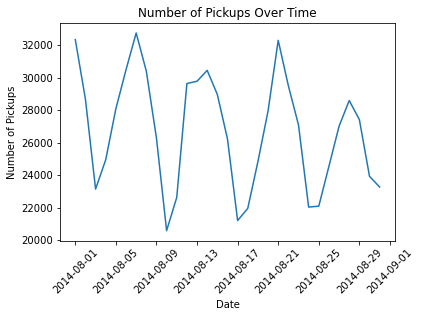

In [52]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
df['Date/Time'] = pd.to_datetime(df['Date/Time'])


pickup_counts = df.groupby(df['Date/Time'].dt.date).size()


# Create a line plot to visualize the number of pickups over time
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

pickup_counts = df.groupby(df['Date/Time'].dt.date).size()

plt.plot(pickup_counts.index, pickup_counts.values)
plt.title('Number of Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)


plt.show()


#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

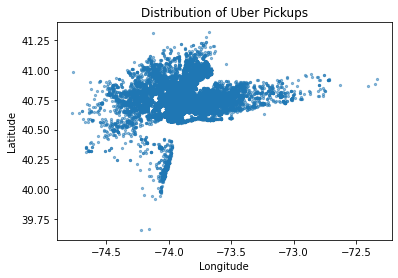

In [53]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.scatter(df['Lon'], df['Lat'], s=5, alpha=0.5)

plt.title('Distribution of Uber Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

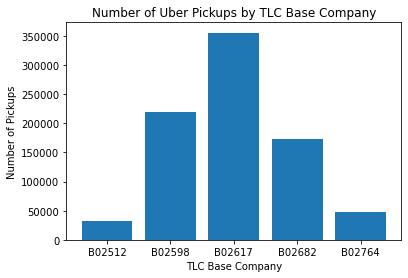

In [55]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickup_counts = df.groupby('Base').size()


plt.bar(pickup_counts.index, pickup_counts.values)
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')



# Display the plot
plt.show()


#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

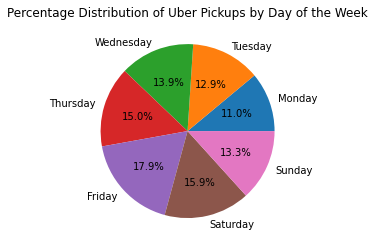

In [59]:
# Group by day of the week and count the number of pickups

df['Date/Time'] = pd.to_datetime(df['Date/Time'])
pickup_counts = df.groupby(df['Date/Time'].dt.dayofweek).size()


# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.pie(pickup_counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')

# Display the plot
plt.show()
